<a href="https://colab.research.google.com/github/Adityajl/Pneumonia-Detection-using-CNN/blob/master/Pneumonia_Detection(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## What is `Pneumonia`?

Pneumonia is a severe lung infection, where it causes the `tiny air sacs in the lungs to be inflamed and filled with fluid or pus`. Patients with pneumonia may need to be hospitalized or admitted to the intensive care unit (ICU).

** Some facts about pneumonia **

- Pneumonia is the world’s leading cause of death among children under the age of 5.
- Pneumonia is the most common reason for US children to be hospitalized.
- or US adults, pneumonia is the most common cause of hospital admissions other than women giving birth.



## How to detect pneumonia?

It turns out that chest X-rays have long been considered the best tool to detect any form of pneumonia. However, studies have shown that even experienced radiologists often have a hard time correctly identify whether something is an infiltrate (a substance denser than air, such as pus or fluid) on the X-Ray. This causes delays in diagnosis, which increases the disease severity and associated mortality rate.

If humans aren’t able to correctly diagnose the disease early, maybe… deep learning can help!


In [2]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'chest-xray-pneumonia:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F17810%2F23812%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240218%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240218T074538Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D65d830842b51d4266fe85ce109ad619a2ebda8f0d66086af2e81c6cd27b19055d664598a323c15ff6db42646171cf0fade8c886eb2a8df113cf80527050258003796e399f7b978c11066df2b9a4189578141d01d8750a4e250f1ee24831fe284862f538dbf12d18ea66684d9770b5dfa96209de4e5ab686d7907ba86bd6c3b1fa63204a0916de5e2d0150e726bde74880eaac7a4dffda5b029d692e900602dda02b6d6fd783706534798991d38d7cc1608b411502f83939ce67bfe1c211a88c155fb3cb0ed0728fd68d6b646ec880be43349e2496af5b38a926067839a3d2a52d22dfe7d7fbdf2d4d2b51d3e0b7e8604e64070fb5ee712451014998a2e730762'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 2463365435 bytes downloaded
Downloaded and uncompressed: chest-xray-pneumonia
Data source import complete.


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Streaming output truncated to the last 5000 lines.
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person438_bacteria_1893.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person564_bacteria_2342.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person721_bacteria_2623.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person593_virus_1142.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person547_virus_1086.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person835_virus_1472.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person3_bacteria_12.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person931_virus_1592.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person775_bacteria_2679.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person494_virus_1000.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMO

## Importing the necessary libraries

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
import keras
import tensorflow as tf
from keras import backend as K
from keras import metrics
from keras.regularizers import l2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, InputLayer, Activation
from keras.preprocessing.image import ImageDataGenerator
from keras.metrics import AUC
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

In [22]:
# Set a seed value
seed_value = 42

# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED'] = str(seed_value)

# 2. Set `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

# 4. Set `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_seed(seed_value)

# 5. For layers that introduce randomness like dropout, make sure to set seed values
#model.add(Dropout(0.25, seed=seed_value))

# 6. Configure a new global `tensorflow` session
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)


## Generate batches of image data (train, validation, and test) with data augmentation

In [23]:
train_path = "/kaggle/input/chest-xray-pneumonia/chest_xray/train"
val_path = "/kaggle/input/chest-xray-pneumonia/chest_xray/val"
test_path = "/kaggle/input/chest-xray-pneumonia/chest_xray/test"

## Set up hyperparameters that will be used later
hyper_dimension = 64
hyper_batch_size = 128
hyper_epochs = 100
hyper_channels = 1
hyper_mode = 'grayscale'

## Generate batches of image data (train, validation, and test) with data augmentation
train_datagen = ImageDataGenerator(rescale=1.0/255.0,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
val_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(directory = train_path,
                                                    target_size = (hyper_dimension, hyper_dimension),
                                                    batch_size = hyper_batch_size,
                                                    color_mode = hyper_mode,
                                                    class_mode = 'binary',
                                                    seed = 42)
val_generator = val_datagen.flow_from_directory(directory = val_path,
                                                 target_size = (hyper_dimension, hyper_dimension),
                                                 batch_size = hyper_batch_size,
                                                 class_mode = 'binary',
                                                 color_mode = hyper_mode,
                                                 shuffle=False,
                                                 seed = 42)
test_generator = test_datagen.flow_from_directory(directory = test_path,
                                                 target_size = (hyper_dimension, hyper_dimension),
                                                 batch_size = hyper_batch_size,
                                                 class_mode = 'binary',
                                                 color_mode = hyper_mode,
                                                 shuffle=False,
                                                 seed = 42)

test_generator.reset()


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


## Train the Model

In [24]:
cnn = Sequential()
cnn.add(InputLayer(input_shape=(hyper_dimension, hyper_dimension, hyper_channels)))

cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Flatten())

cnn.add(Dense(activation='relu', units=128))
cnn.add(Dense(activation='sigmoid', units=1))

cnn.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=[AUC()])
cnn_model = cnn.fit_generator(train_generator,
                              steps_per_epoch = len(train_generator),
                              epochs = 50,
                              validation_data = val_generator,
                              validation_steps = len(val_generator),
                              verbose=2)

Exception ignored in: <function BaseSession.__del__ at 0x7c5ce76cc4c0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/client/session.py", line 778, in __del__
    if self._session is not None:
AttributeError: 'Session' object has no attribute '_session'
<ipython-input-24-179509bc8ca1>:19: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn_model = cnn.fit_generator(train_generator,


Epoch 1/50
41/41 - 56s - loss: 0.5712 - auc: 0.5656 - val_loss: 0.6978 - val_auc: 0.6250 - 56s/epoch - 1s/step
Epoch 2/50
41/41 - 52s - loss: 0.4173 - auc: 0.8556 - val_loss: 0.6216 - val_auc: 0.8438 - 52s/epoch - 1s/step
Epoch 3/50
41/41 - 51s - loss: 0.2611 - auc: 0.9454 - val_loss: 0.4911 - val_auc: 0.8906 - 51s/epoch - 1s/step
Epoch 4/50
41/41 - 51s - loss: 0.2403 - auc: 0.9529 - val_loss: 0.4932 - val_auc: 0.8750 - 51s/epoch - 1s/step
Epoch 5/50
41/41 - 52s - loss: 0.2067 - auc: 0.9654 - val_loss: 0.6668 - val_auc: 0.8828 - 52s/epoch - 1s/step
Epoch 6/50
41/41 - 51s - loss: 0.2328 - auc: 0.9559 - val_loss: 0.6371 - val_auc: 0.8438 - 51s/epoch - 1s/step
Epoch 7/50
41/41 - 51s - loss: 0.1917 - auc: 0.9701 - val_loss: 0.7939 - val_auc: 0.8359 - 51s/epoch - 1s/step
Epoch 8/50
41/41 - 51s - loss: 0.1983 - auc: 0.9684 - val_loss: 0.5516 - val_auc: 0.8125 - 51s/epoch - 1s/step
Epoch 9/50
41/41 - 52s - loss: 0.1846 - auc: 0.9714 - val_loss: 0.6020 - val_auc: 0.7812 - 52s/epoch - 1s/step
E

## Create function that outputs metrics and charts

In [25]:
def create_charts(cnn, cnn_model):
    ## DEFINE ##
    ## Define 1:  train & validation loss
    train_loss = cnn_model.history['loss']
    val_loss = cnn_model.history['val_loss']

    ## Define 2: train & validation AUC
    train_auc_name = list(cnn_model.history.keys())[3]
    val_auc_name = list(cnn_model.history.keys())[1]
    train_auc = cnn_model.history[train_auc_name]
    val_auc = cnn_model.history[val_auc_name]

    ## Define 3: y_pred & y_true
    y_true = test_generator.classes
    Y_pred = cnn.predict_generator(test_generator, steps = len(test_generator))
    y_pred = (Y_pred > 0.5).T[0]
    y_pred_prob = Y_pred.T[0]

    ## PLOT ##
    fig = plt.figure(figsize=(13, 10))

    ## PLOT 1: TRAIN VS. VALIDATION LOSS
    plt.subplot(2,2,1)
    plt.title("Training vs. Validation Loss")
    plt.plot(train_loss, label='training loss')
    plt.plot(val_loss, label='validation loss')
    plt.xlabel("Number of Epochs", size=14)
    plt.legend()

    ## PLOT 2: TRAIN VS. VALIDATION AUC
    plt.subplot(2,2,2)
    plt.title("Training vs. Validation AUC Score")
    plt.plot(train_auc, label='training auc')
    plt.plot(val_auc, label='validation auc')
    plt.xlabel("Number of Epochs", size=14)
    plt.legend()

    ## PLOT 3: CONFUSION MATRIX
    plt.subplot(2,2,3)
      # Set up the labels for in the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    names = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']
    counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(names, percentages)]
    labels = np.asarray(labels).reshape(2,2)
    ticklabels = ['Normal', 'Pneumonia']

      # Create confusion matrix as heatmap
    sns.set(font_scale = 1.4)
    ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Oranges', xticklabels=ticklabels, yticklabels=ticklabels )
    plt.xticks(size=12)
    plt.yticks(size=12)
    plt.title("Confusion Matrix") #plt.title("Confusion Matrix\n", fontsize=10)
    plt.xlabel("Predicted", size=14)
    plt.ylabel("Actual", size=14)
    #plt.savefig('cm.png', transparent=True)

    ## PLOT 4: ROC CURVE
    plt.subplot(2,2,4)
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
    auc = roc_auc_score(y_true, y_pred_prob)
    plt.title('ROC Curve')
    plt.plot([0, 1], [0, 1], 'k--', label = "Random (AUC = 50%)")
    plt.plot(fpr, tpr, label='CNN (AUC = {:.2f}%)'.format(auc*100))
    plt.xlabel('False Positive Rate', size=14)
    plt.ylabel('True Positive Rate', size=14)
    plt.legend(loc='best')
    #plt.savefig('roc.png', bbox_inches='tight', pad_inches=1)

    ## END PLOTS
    plt.tight_layout()
    ;

    ## Summary Statistics
    TN, FP, FN, TP = cm.ravel() # cm[0,0], cm[0, 1], cm[1, 0], cm[1, 1]
    accuracy = (TP + TN) / np.sum(cm) # % positive out of all predicted positives
    precision = TP / (TP+FP) # % positive out of all predicted positives
    recall =  TP / (TP+FN) # % positive out of all supposed to be positives
    specificity = TN / (TN+FP) # % negative out of all supposed to be negatives
    f1 = 2*precision*recall / (precision + recall)
    stats_summary = '[Summary Statistics]\nAccuracy = {:.2%} | Precision = {:.2%} | Recall = {:.2%} | Specificity = {:.2%} | F1 Score = {:.2%}'.format(accuracy, precision, recall, specificity, f1)
    print(stats_summary)

## Output results via metrics and charts

<ipython-input-25-67a1a93bce5c>:15: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = cnn.predict_generator(test_generator, steps = len(test_generator))


[Summary Statistics]
Accuracy = 87.82% | Precision = 84.28% | Recall = 98.97% | Specificity = 69.23% | F1 Score = 91.04%


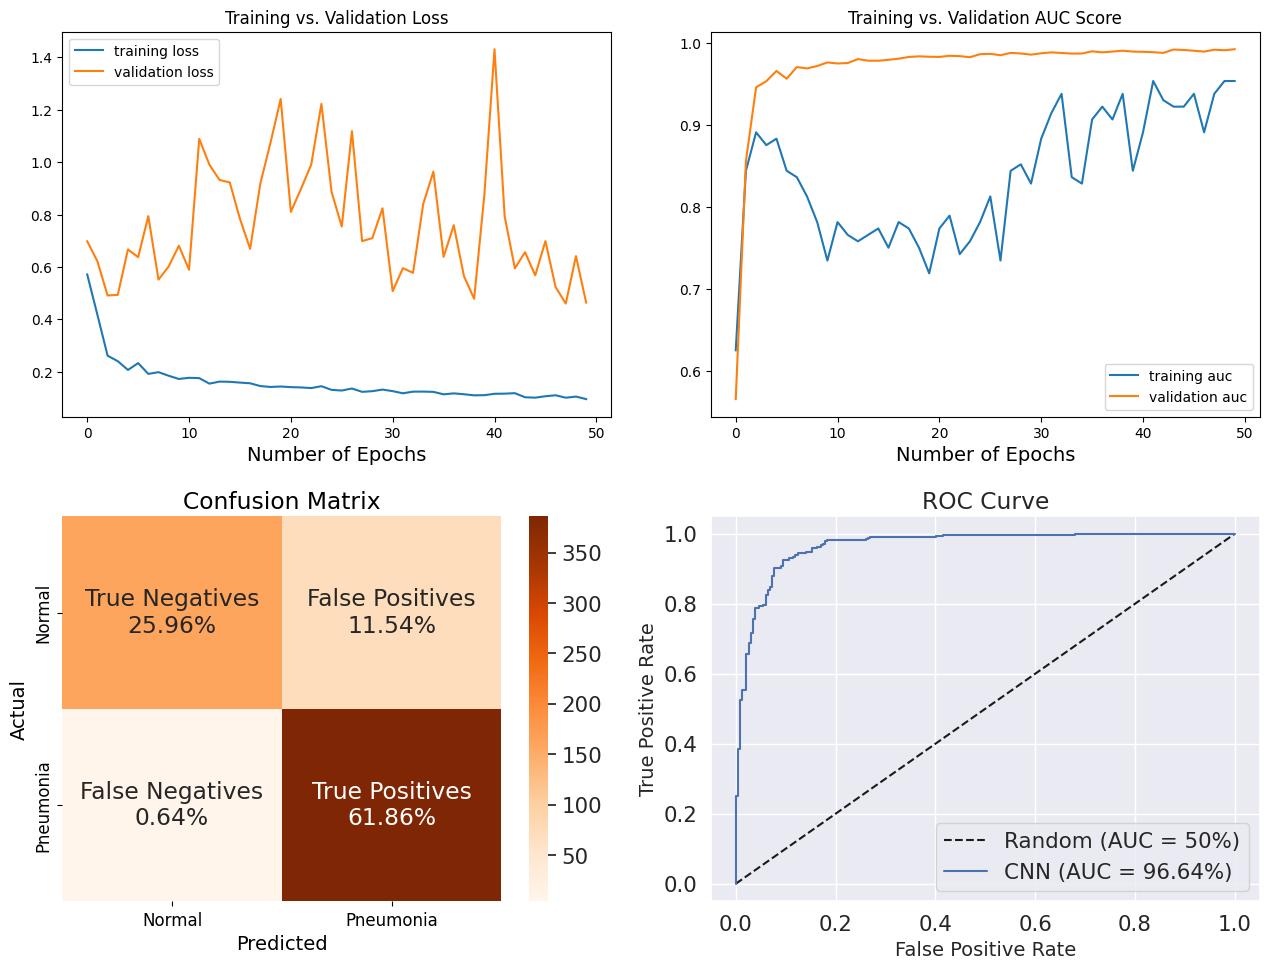

In [26]:
create_charts(cnn, cnn_model)